Loading data

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv("DataScience_salaries_2024.csv")

# Yearly Inflation Rates
inflation = [1.022, 1.017, 1.036, 1.062, 1.048]

# Calculate the inflation adjusted salary for each year
data.loc[data['work_year'] == 2019, 'salary_in_usd'] *= np.prod(inflation[0:4])
data.loc[data['work_year'] == 2020, 'salary_in_usd'] *= np.prod(inflation[1:4])
data.loc[data['work_year'] == 2021, 'salary_in_usd'] *= np.prod(inflation[2:4])
data.loc[data['work_year'] == 2022, 'salary_in_usd'] *= np.prod(inflation[3:4])
data.loc[data['work_year'] == 2023, 'salary_in_usd'] *= inflation[4]

data['salary_in_usd'] = data['salary_in_usd'].apply(np.round)

data.head(20)

/var/folders/pg/091z68c93wb7x_j1473t961h0000gn/T/ipykernel_2965/4064310478.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 39985.17595884  46647.32056942  45295.64594906  37496.66241938
 503521.1748     461001.608928   363654.1818     335680.7832
  51354.68408582 290923.34544    279733.986      212821.6165488
 212597.82936    210359.957472   183505.494816   131031.87478618
 167840.3916     154804.7878524  154413.160272   151056.35244
 146356.8214752  165894.56199338 139866.993      134272.31328
 132034.441392   128677.63356    123082.95384    118607.210064
 117488.27412    117488.27412    115250.402232   111893.5944
 127611.28760537 111893.5944     109655.722512   106298.91468
 101823.170904   126296.53787117  97347.427128   121990.87235866
  95109.55524    102088.35872273  80563.387968    78325.51608
  89328.01321735  89328.01321735  82946.72152872  78481.04817622
  50075.74030183  67136.15664   

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,44051.0,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,39893.0,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,39985.0,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,85118.0,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,101300.0,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,70097.0,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,104153.0,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,18780.0,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,81040.0,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,44401.0,JP,50,JP,L


Basic information

In [145]:
# Check for missing values and printing info about the dataset
print("Instances: " + str(data.shape[0]))
print("Attributes: " + str(data.shape[1]) +"\n")
data.info()
data.describe()

Instances: 14838
Attributes: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           14838 non-null  int64  
 1   experience_level    14838 non-null  object 
 2   employment_type     14838 non-null  object 
 3   job_title           14838 non-null  object 
 4   salary              14838 non-null  int64  
 5   salary_currency     14838 non-null  object 
 6   salary_in_usd       14838 non-null  float64
 7   employee_residence  14838 non-null  object 
 8   remote_ratio        14838 non-null  int64  
 9   company_location    14838 non-null  object 
 10  company_size        14838 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,155247.734398,32.760480
std,0.700799,3.562354e+05,71197.357472,46.488278
min,2020.000000,1.400000e+04,15930.000000,0.000000
25%,2023.000000,1.021000e+05,105700.000000,0.000000
50%,2023.000000,1.422000e+05,146720.000000,0.000000
75%,2024.000000,1.875000e+05,193880.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


There are 14838 instance and 11 attributes. There are 3 numerical attributes and 8 categorical attributes. There is no missing value.

In [146]:
# Defining new dataFrame with already numerical columns

encoded_data = data[['salary_in_usd','employee_residence','company_location','remote_ratio']].copy()

print(encoded_data)

       salary_in_usd employee_residence company_location  remote_ratio
0            44051.0                 CL               CL           100
1            39893.0                 HU               US            50
2            39985.0                 HU               HU            50
3            85118.0                 JP               JP            50
4           101300.0                 IN               IN            50
...              ...                ...              ...           ...
14833        15930.0                 GH               GH           100
14834        16784.0                 NG               CA             0
14835        16503.0                 TH               TH           100
14836        15930.0                 ID               ID             0
14837        17865.0                 DE               DE           100

[14838 rows x 4 columns]


Preprocessing

In [ ]:
# Using IQR to remove outliers

Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound)].reset_index().copy()
data.drop('index', axis = 1, inplace = True)


In [150]:
# Function for Job Title Preprocessing
def process_job_title(job_titles):
  #define keywords
  job_cat_key = ['Data', 'Machine Learning', 'Business Intelligence', 'Artificial Intelligence', 'Research', 'Other']
  job_title_key = ['Engineer', 'Analyst', 'Developer', 'Scientist', 'Speicialist', 'Manager']

  job_cat_new = []
  job_title_new = []

  def check_job_cat_or_type(jobs, title):
    for job in jobs:
       if job in title:
          return job
    return None

  for i, title in enumerate(job_titles):
     #replace abbreviations
     title = title.replace('ML', 'Machine Learning').replace('BI', 'Business Intelligence').replace('AI', 'Artificial Intelligence')

  for i, title in enumerate(job_titles):
    check1 = check_job_cat_or_type(job_cat_key, title)
    check2 = check_job_cat_or_type(job_title_key, title)

    if check1 is not None:
        job_cat_new.append(check1)
    else:
        job_cat_new.append('Other')
    
    if check2 is not None:
        job_title_new.append(check2)
    else:
        job_title_new.append('Other')

  return job_cat_new, job_title_new


In [151]:
# Function for Location Preprocessing
import pycountry
import pycountry_convert as pc

def process_location(job_data):
    location_dic = job_data.value_counts().to_dict()
    filter_threshold = 0.6

    job_data = job_data.values
    
    def get_continent(country_code):
        country_name = pycountry.countries.get(alpha_2 = country_code)
        if country_name:
            return pc.country_alpha2_to_continent_code(country_code)
        else:
            return 'Other'

    for i in range(len(job_data)):
        if location_dic[job_data[i]] / len(job_data) < filter_threshold:
            job_data[i] = get_continent(job_data[i])
    
    return job_data

In [152]:
# Running the preprocessing functions and adding them to the data

data['employee_residence'] = process_location(data['employee_residence'])
data['company_location'] = process_location(data['company_location'])

print(data['employee_residence'].value_counts())
print(data['company_location'].value_counts())

data['job_category'], data['job_title'] = process_job_title(data['job_title'])

print(data['job_category'].value_counts())
print(data['job_title'].value_counts())
data

employee_residence
US    12696
EU     1176
NA      408
AS      149
OC       57
SA       56
AF       54
Name: count, dtype: int64
company_location
US    12744
EU     1172
NA      409
AS      117
OC       62
SA       46
AF       46
Name: count, dtype: int64
job_category
Data                     10115
Machine Learning          1735
Other                     1430
Research                   816
Business Intelligence      500
Name: count, dtype: int64
job_title
Engineer     6099
Scientist    4042
Analyst      2640
Other        1173
Manager       418
Developer     224
Name: count, dtype: int64


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2021,MI,FT,Scientist,30400000,CLP,44051.0,SA,100,SA,L,Data
1,2021,MI,FT,Analyst,11000000,HUF,39893.0,EU,50,US,L,Data
2,2020,MI,FT,Scientist,11000000,HUF,39985.0,EU,50,EU,L,Data
3,2021,MI,FT,Engineer,8500000,JPY,85118.0,AS,50,AS,S,Other
4,2022,SE,FT,Engineer,7500000,INR,101300.0,AS,50,AS,L,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
14591,2022,MI,FT,Developer,15000,USD,15930.0,AF,100,AF,M,Business Intelligence
14592,2020,EX,FT,Analyst,15000,USD,16784.0,AF,0,NA,M,Data
14593,2021,EN,FT,Developer,15000,USD,16503.0,AS,100,AS,L,Machine Learning
14594,2022,EN,FT,Analyst,15000,USD,15930.0,AS,0,AS,L,Data


Encoding

In [153]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoding_cat = ['employee_residence','company_location','remote_ratio', 'job_category', 'job_title', 'employment_type','company_size']
ordinal_encoding_cat = ['experience_level']

ode1 = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX']])
ohe = OneHotEncoder(sparse_output = False)

# columnTransformer to run the encodings at once
ct = ColumnTransformer(
    transformers=[
        ('ode1', ode1, ordinal_encoding_cat),
        ('ohe', ohe, one_hot_encoding_cat),
    ],
    remainder='passthrough'
)

trf = ct.fit_transform(data)

# Adding the newly encoded columns to the dataset

df = pd.DataFrame(trf,columns=ct.get_feature_names_out())

# Dropping the old columns
data.drop(one_hot_encoding_cat + ordinal_encoding_cat, axis=1, inplace=True)

data = data.join(df)

data

,work_year,salary,salary_currency,salary_in_usd,ode1__experience_level,ohe__employee_residence_AF,ohe__employee_residence_AS,ohe__employee_residence_EU,ohe__employee_residence_NA,ohe__employee_residence_OC,...,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__work_year,remainder__salary,remainder__salary_currency,remainder__salary_in_usd
0,2021,30400000,CLP,44051.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2021,30400000,CLP,44051.0
1,2021,11000000,HUF,39893.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2021,11000000,HUF,39893.0
2,2020,11000000,HUF,39985.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2020,11000000,HUF,39985.0
3,2021,8500000,JPY,85118.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2021,8500000,JPY,85118.0
4,2022,7500000,INR,101300.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2022,7500000,INR,101300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,2022,15000,USD,15930.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2022,15000,USD,15930.0
14592,2020,15000,USD,16784.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2020,15000,USD,16784.0
14593,2021,15000,USD,16503.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2021,15000,USD,16503.0
14594,2022,15000,USD,15930.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2022,15000,USD,15930.0


Split Data

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the columns that will artitically influence models

data_drop = ['work_year', 'salary', 'salary_currency', 'remainder__salary_currency', 'remainder__salary_in_usd','remainder__salary','remainder__work_year']
data.drop(data_drop, axis=1, inplace=True)

# Standardize the salary_in_usd column
scaler = StandardScaler()
data['salary_in_usd'] = pd.DataFrame(scaler.fit_transform(data[['salary_in_usd']]))

# Split the data into training and testing sets
y = data['salary_in_usd']
X = data.drop('salary_in_usd', axis=1, inplace=False)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

In [156]:
from sklearn.metrics import mean_squared_error, r2_score

# Custom function to neatly calculate and display the metrics
def calculate_metrics(y_test, y_pred, threshold): 

    # Compute mse, rmse, r2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_test, y_pred)

    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2score)

    print("The accuracy of our model (based on R2 score) is {}%".format(round(r2score, 2) * 100))

# Models

Baseline Regression

In [157]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy = 'mean')

dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_val)

calculate_metrics(y_val, y_pred_dummy, 0.5)

Mean Squared Error:  0.9875609519048835
Root Mean Squared Error:  0.9937610134760185
R2 Score:  -0.00010097444762435792
The accuracy of our model (based on R2 score) is -0.0%


Linear regression

In [158]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = model.predict(X_val)

calculate_metrics(y_val, y_pred_linear, 0.5)

Mean Squared Error:  0.6490004075221756
Root Mean Squared Error:  0.8056056153740337
R2 Score:  0.34275860266866076
The accuracy of our model (based on R2 score) is 34.0%


Polynomial Regression

In [159]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_val)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

calculate_metrics(y_val, y_pred_poly, 0.5)

Mean Squared Error:  1.1324528452112517e+23
Root Mean Squared Error:  336519367230.36487
R2 Score:  -1.1468327011382688e+23
The accuracy of our model (based on R2 score) is -1.1468327011382687e+25%


In [160]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

y_pred_svr = model_svr.predict(X_val)

calculate_metrics(y_val, y_pred_svr, 0.5)

Mean Squared Error:  0.6343608808900165
Root Mean Squared Error:  0.7964677525738355
R2 Score:  0.3575840216182795
The accuracy of our model (based on R2 score) is 36.0%


Decision Tree Regressor

In [161]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regressor 
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions with the trained model
y_pred_dt = dt_regressor.predict(X_val)

calculate_metrics(y_val, y_pred_dt, 0.5)

Mean Squared Error:  0.6636468432894198
Root Mean Squared Error:  0.8146452254137502
R2 Score:  0.3279261868519444
The accuracy of our model (based on R2 score) is 33.0%


Random Forest Regressor

In [162]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions with the trained model
y_pred_rf = rf_regressor.predict(X_val)

# Calculate the metrics
calculate_metrics(y_val, y_pred_rf, 0.5)


Mean Squared Error:  0.6560097700791785
Root Mean Squared Error:  0.8099443006029355
R2 Score:  0.33566023541346124
The accuracy of our model (based on R2 score) is 34.0%


Gradient Boosting Regressor 

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the gradient boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions with the trained model
y_pred_gb = gb_regressor.predict(X_val)

# Calculate the metrics
calculate_metrics(y_val, y_pred_gb, 0.5)

Mean Squared Error:  0.6322369524149647
Root Mean Squared Error:  0.7951332922315382
R2 Score:  0.3597349196802768
The accuracy of our model (based on R2 score) is 36.0%


The models perform well, as the mean squared error is small compared to the size of input labels.

Model Selection

In [164]:
#test if overfitting using training data
print('Linear')
y_pred_linear_test = model.predict(X_train)
calculate_metrics(y_train, y_pred_linear_test, 0.5)
print('\n')

print('SVR')
y_pred_svr_test = model_svr.predict(X_train)
calculate_metrics(y_train, y_pred_svr_test, 0.5)
print('\n')

print('Decision Tree')
y_pred_dt_test = dt_regressor.predict(X_train)
calculate_metrics(y_train, y_pred_dt_test, 0.5)
print('\n')

print('Gredient Boosting\n')
y_pred_gb_test = gb_regressor.predict(X_train)
calculate_metrics(y_train, y_pred_gb_test, 0.5)
print('\n')

Linear
Mean Squared Error:  0.6537563034514501
Root Mean Squared Error:  0.8085519794369748
R2 Score:  0.34609805553203543
The accuracy of our model (based on R2 score) is 35.0%


SVR
Mean Squared Error:  0.6357917338228121
Root Mean Squared Error:  0.7973654957563765
R2 Score:  0.36406662723020333
The accuracy of our model (based on R2 score) is 36.0%


Decision Tree
Mean Squared Error:  0.6602257395621737
Root Mean Squared Error:  0.812542761682223
R2 Score:  0.3396271781881697
The accuracy of our model (based on R2 score) is 34.0%


Gredient Boosting

Mean Squared Error:  0.6296948100657747
Root Mean Squared Error:  0.7935331184429385
R2 Score:  0.3701649092336835
The accuracy of our model (based on R2 score) is 37.0%




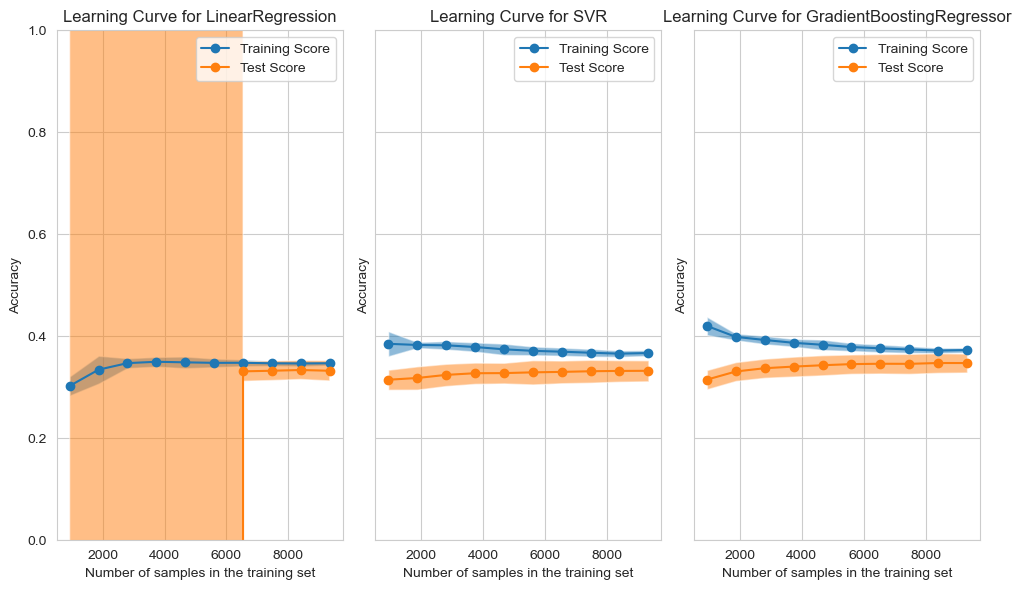

In [165]:
# Plotting the learning curves

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train_temp,
    "y": y_train_temp,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([model, model_svr, gb_regressor]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
    ax[ax_idx].set_ylim(0, 1)

plt.tight_layout()
    


In [166]:
# Testing a linear SVR kernel

model_svr = SVR(kernel = 'linear')
model_svr.fit(X_train, y_train)

y_pred_svr = model_svr.predict(X_val)

calculate_metrics(y_val, y_pred_svr, 0.5)

Mean Squared Error:  0.6549399069135492
Root Mean Squared Error:  0.8092835763275745
R2 Score:  0.33674368367294094
The accuracy of our model (based on R2 score) is 34.0%


Similar, just slightly worse performance than the default rbf kernel. This indicates that a linear relationship can be found among instances and targets.

Cross-validation

In [167]:
# Running Cross Validation metrics
from sklearn.model_selection import cross_val_score

for index, estimator in enumerate([model, model_ridge, gb_regressor]):
    mses = -cross_val_score(estimator, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    print(estimator.__class__.__name__)
    print(pd.Series(mses).describe())
    print('\n')

LinearRegression
count    10.000000
mean      0.814865
std       0.019014
min       0.791322
25%       0.801877
50%       0.809136
75%       0.830563
max       0.848149
dtype: float64


Ridge
count    10.000000
mean      0.810783
std       0.017807
min       0.789923
25%       0.800700
50%       0.805556
75%       0.810732
max       0.847133
dtype: float64


GradientBoostingRegressor
count    10.000000
mean      0.804689
std       0.016669
min       0.785972
25%       0.792295
50%       0.801727
75%       0.807054
max       0.838721
dtype: float64




In [168]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune on
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Initialize the Ridge regressor
ridge = Ridge()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator_linear = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_estimator_linear.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Best Model Hyperparameters:", best_params)
print("Best Model Mean Squared Error on Test Set:", mse)

Best Model Hyperparameters: {'alpha': 10.0}
Best Model Mean Squared Error on Test Set: 0.6476845409225035


In [169]:
# Define the hyperparameters to tune on
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting regressor with a Grid Search
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator_gb = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_estimator_gb.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print("Best Model Hyperparameters:", best_params)
print("Best Model Mean Squared Error on Validation Set:", val_mse)

Best Model Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Mean Squared Error on Validation Set: 0.6253407555381476


In [170]:
# Evaluate the best model on the test set based on the best hyperparameters

best_estimator_linear.fit(X_train, y_train)
best_estimator_gb.fit(X_train, y_train)

best_linear = best_estimator_linear.predict(X_test)
best_gb = best_estimator_gb.predict(X_test)

calculate_metrics(y_test, best_linear, 0.5)
print('\n')
calculate_metrics(y_test, best_gb, 0.5)


Mean Squared Error:  0.6562231360214994
Root Mean Squared Error:  0.810076006323789
R2 Score:  0.35060100487941726
The accuracy of our model (based on R2 score) is 35.0%
Mean Squared Error:  0.6424088655997118
Root Mean Squared Error:  0.8015041270010478
R2 Score:  0.36427161909247496
The accuracy of our model (based on R2 score) is 36.0%
